In [8]:
import numpy as np
import multiprocessing as mp

import string
import spacy 
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd

## Preprocessing

In [23]:
#!pip install spacy_cleaner

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize


In [22]:

df = pd.read_csv('minerva_university_responses.csv',nrows=10000)

In [25]:
df.head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
0,1,12522,41,The strengths of Plato's approach is his const...,#objectivemorality,2
1,2,12522,42,Having a difficulty with his Divided Line. Th...,#deductivearg,2
2,3,12522,44,"How can one know if he's in the cave or not, i...",#objectivemorality,3
3,4,12522,237,S: the hierarchy of the chart we filled out at...,#objectivemorality,3
4,5,12522,239,It is difficult to grasp how to apply Plato's ...,#objectivemorality,3


In [26]:
nltk.download('punkt');


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Polin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
from bs4 import BeautifulSoup
import re
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Poll Responses Response'] = df['Poll Responses Response'].apply(cleanText)

[]
['Sally jumped down']


In [37]:
df['Poll Responses Response'] = df['Poll Responses Response'].apply(lambda x: [sent.text for sent in nlp(x).sents])

In [38]:
df.head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,tokenized
0,1,12522,41,[the strengths of plato's approach is his cons...,#objectivemorality,2,[]
1,2,12522,42,"[having a difficulty with his divided line., t...",#deductivearg,2,[]
2,3,12522,44,"[how can one know if he's in the cave or not, ...",#objectivemorality,3,[]
3,4,12522,237,[s: the hierarchy of the chart we filled out a...,#objectivemorality,3,[]
4,5,12522,239,[it is difficult to grasp how to apply plato's...,#objectivemorality,3,[]


In [39]:
def remove_stopwords(tokenized_column):
    """Return a list of tokens with English stopwords removed. 

    Args:
        column: Pandas dataframe column of tokenized data from tokenize()

    Returns:
        tokens (list): Tokenized list with stopwords removed.

    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [40]:
df['Poll Responses Response'] = df.apply(lambda x: remove_stopwords(x['Poll Responses Response']), axis=1)
df[['id', 'Poll Responses Response']].head()

,id,Poll Responses Response
0,1,[the strengths of plato's approach is his cons...
1,2,"[having a difficulty with his divided line., t..."
2,3,"[how can one know if he's in the cave or not, ..."
3,4,[s: the hierarchy of the chart we filled out a...
4,5,[it is difficult to grasp how to apply plato's...


In [41]:
def apply_stemming(tokenized_column):
    """Return a list of tokens with Porter stemming applied.

    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.

    Returns:
        tokens (list): Tokenized list with words Porter stemmed.

    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [42]:
df['porter_stemmed'] = df.apply(lambda x: apply_stemming(x['Poll Responses Response']), axis=1)
df[['id', 'porter_stemmed']].head()

,id,porter_stemmed
0,1,[the strengths of plato's approach is his cons...
1,2,"[having a difficulty with his divided line., t..."
2,3,"[how can one know if he's in the cave or not, ..."
3,4,[s: the hierarchy of the chart we filled out a...
4,5,[it is difficult to grasp how to apply plato's...


## Building n-grams

## Training the model

## Extracting valid phrases

## N-grams in Minerva University Responses

In [8]:
import re
import pandas as pd
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe', 'minerva', 'would','could', 'community', 'help', 'u']

import matplotlib.pyplot as plt

In [9]:
#df = pd.read_csv('minerva_university_responses.csv',nrows=10000)

In [10]:
def basic_clean(text):
    '''
      A simple function to clean up the data. All the words that
      are not designated as a stop word is then lemmatized after
      encoding and basic regex parsing are performed.
    '''    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [11]:
#nltk.download('wordnet')


In [12]:
df = pd.read_csv('minerva_university_responses.csv')

# SS
networks = df.loc[df['Assessment reports Hashtag'] == '#networks']

# NS
breakitdown = df.loc[df['Assessment reports Hashtag'] == '#breakitdown']

# AH
context = df.loc[df['Assessment reports Hashtag'] == '#context']

# CS
induction = df.loc[df['Assessment reports Hashtag'] == '#induction']

In [32]:
# list of all lOs, HCs

hclo_lst = df['Assessment reports Hashtag'].dropna().unique().tolist()

In [31]:
'''
# Separating the dataframe by HCs/LOs and grades

df = pd.read_csv('minerva_university_responses.csv')


# Get all HCs/LOs list
hclo_lst = df['Assessment reports Hashtag'].dropna().unique().tolist()

# Make a dataframe for each HC/LO
hclos_dfs = {}
for hclo in hclo_lst:
    hclos_dfs[hclo] = df.loc[df['Assessment reports Hashtag'] == hclo]
    
hclos_dfs['#networks'].head()


# Make dataframes for each score of each HC/LO
hclos_scores_dfs = {}

for hclo in hclo_lst:
    cur_df = hclos_dfs[hclo]
    hclos_scores_dfs[f'{hclo}_4'] = cur_df.loc[cur_df['Assessment reports Score'] == 4.0]
    hclos_scores_dfs[f'{hclo}_3'] = cur_df.loc[cur_df['Assessment reports Score'] == 3.0]
    hclos_scores_dfs[f'{hclo}_2'] = cur_df.loc[cur_df['Assessment reports Score'] == 2.0]
    hclos_scores_dfs[f'{hclo}_1'] = cur_df.loc[cur_df['Assessment reports Score'] == 1.0]
    

hclos_scores_dfs['#networks_4'].head()

'''


In [33]:
hclos_dfs = {}

for hclo in hclo_lst:
    hclos_dfs[hclo] = df.loc[df['Assessment reports Hashtag'] == hclo]
    
hclos_dfs['#networks'].head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
3207,3208,31079.0,247.0,#networks 2 for the first reading (Winners Don...,#networks,4.0
3212,3213,31079.0,327.0,4 in #networks. The Ohtsuki paper introduces t...,#networks,3.0
3400,3401,32921.0,619.0,I think both #utility and #motivation are key ...,#networks,3.0
3405,3406,32921.0,629.0,When Zili was addressing the point of what are...,#networks,3.0
3408,3409,32921.0,701.0,After my point about investors with desire for...,#networks,3.0


In [34]:
# get scores for each LO
hclos_scores_dfs = {}

for hclo in hclo_lst:
    cur_df = hclos_dfs[hclo]
    hclos_scores_dfs[f'{hclo}_4'] = cur_df.loc[cur_df['Assessment reports Score'] == 4.0]
    hclos_scores_dfs[f'{hclo}_3'] = cur_df.loc[cur_df['Assessment reports Score'] == 3.0]
    hclos_scores_dfs[f'{hclo}_2'] = cur_df.loc[cur_df['Assessment reports Score'] == 2.0]
    hclos_scores_dfs[f'{hclo}_1'] = cur_df.loc[cur_df['Assessment reports Score'] == 1.0]
    

hclos_scores_dfs['#networks_4'].head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
3207,3208,31079.0,247.0,#networks 2 for the first reading (Winners Don...,#networks,4.0
3570,3571,33262.0,246.0,One positive outcome is that we started to rea...,#networks,4.0
3578,3579,33262.0,335.0,this crisis made it clear how globally interco...,#networks,4.0
3594,3595,33267.0,260.0,One of the negative outcomes is huge unemplyem...,#networks,4.0
3597,3598,33267.0,283.0,The financial crisis triggered bank runs and b...,#networks,4.0


In [36]:
hclos_scores_dfs['#utility_3'].head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
3388,3389,32916.0,666.0,"Oren's question during the breakout groups, ""h...",#utility,3.0
3390,3391,32916.0,667.0,I liked the last two statements by Zahwa and a...,#utility,3.0
3396,3397,32916.0,726.0,Oren's questions were really good and I think ...,#utility,3.0
3438,3439,32931.0,621.0,I find the moment when we were discussing abou...,#utility,3.0
3443,3444,32931.0,658.0,I thought Josh raised a lot of good questions ...,#utility,3.0


In [39]:
hclos_response_words = {}

for hclo in hclo_lst:
    hclos_response_words[f'{hclo}_4'] = basic_clean(''.join(str(hclos_scores_dfs[f'{hclo}_4']['Poll Responses Response'].tolist())))
    hclos_response_words[f'{hclo}_3'] = basic_clean(''.join(str(hclos_scores_dfs[f'{hclo}_3']['Poll Responses Response'].tolist())))
    hclos_response_words[f'{hclo}_2'] = basic_clean(''.join(str(hclos_scores_dfs[f'{hclo}_2']['Poll Responses Response'].tolist())))
    hclos_response_words[f'{hclo}_1'] = basic_clean(''.join(str(hclos_scores_dfs[f'{hclo}_1']['Poll Responses Response'].tolist())))


In [41]:
#hclos_response_words['#utility_4']
hclos_response_words.keys()

dict_keys(['#objectivemorality_4', '#objectivemorality_3', '#objectivemorality_2', '#objectivemorality_1', '#deductivearg_4', '#deductivearg_3', '#deductivearg_2', '#deductivearg_1', '#justificationmethods_4', '#justificationmethods_3', '#justificationmethods_2', '#justificationmethods_1', '#moraltruth_4', '#moraltruth_3', '#moraltruth_2', '#moraltruth_1', '#bodytheories_4', '#bodytheories_3', '#bodytheories_2', '#bodytheories_1', '#decisioninference_4', '#decisioninference_3', '#decisioninference_2', '#decisioninference_1', '#correlation_4', '#correlation_3', '#correlation_2', '#correlation_1', 'NONE_4', 'NONE_3', 'NONE_2', 'NONE_1', '#interpretivelens_4', '#interpretivelens_3', '#interpretivelens_2', '#interpretivelens_1', '#buckinghampi_4', '#buckinghampi_3', '#buckinghampi_2', '#buckinghampi_1', '#evaluatephylogenies_4', '#evaluatephylogenies_3', '#evaluatephylogenies_2', '#evaluatephylogenies_1', '#buildphylogenies_4', '#buildphylogenies_3', '#buildphylogenies_2', '#buildphylogeni

In [42]:
hclos_ngrams = {}
for key in hclos_response_words.keys():
    hclos_ngrams[f'{key}_bigram'] = (pd.Series(nltk.ngrams(hclos_response_words[key], 2)).value_counts())[:10]
    hclos_ngrams[f'{key}_trigram'] = (pd.Series(nltk.ngrams(hclos_response_words[key], 3)).value_counts())[:10]
    hclos_ngrams[f'{key}_quadgram'] = (pd.Series(nltk.ngrams(hclos_response_words[key], 4)).value_counts())[:10]
    

In [45]:
hclos_ngrams['#utility_4_trigram']

(rational, choice, theory)          41
(people, commit, crime)             26
(diminishing, marginal, utility)    14
(effective, decision, making)       10
(example, drug, dealer)             10
(according, prospect, theory)        8
(make, decision, based)              7
(likely, commit, crime)              7
(based, reference, point)            7
(benefit, outweigh, cost)            6
dtype: int64

In [51]:
def plot_most_common_bars(hclo, score, n):
    if n == 2:
        ngram = 'bigram'
    elif n == 3:
        ngram = 'trigram'
    elif n == 4:
        ngram = 'quadgram'
    else:
        return 'Not supported.'
        
    ngram_key = hclos_ngrams[f'{hclo}_{score}_{ngram}']
    ngram_key.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
    plt.title(f'10 Most Frequently Occuring {ngram.capitalize()} in {hclo} {score} Responses')
    plt.ylabel(ngram.capitalize())
    plt.xlabel('# of Occurrences')
    plt.show()

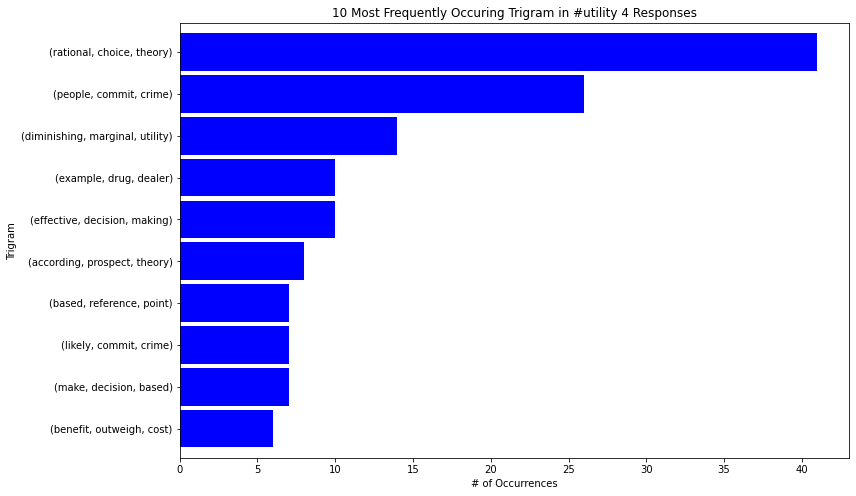

In [53]:
plot_most_common_bars('#utility', 4, 3)

In [46]:

# # plots
# b4_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 4 Responses')
# plt.ylabel('Bigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b4_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 4 Responses')
# plt.ylabel('Trigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b4_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 4 Responses')
# plt.ylabel('Quadgram')
# plt.xlabel('# of Occurrences')
# plt.show()

# print('-------------------------------')

# b3_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 3 Responses')
# plt.ylabel('Bigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b3_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 3 Responses')
# plt.ylabel('Trigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b3_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 3 Responses')
# plt.ylabel('Quadgram')
# plt.xlabel('# of Occurrences')
# plt.show()

# print('-------------------------------')

# b2_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 2 Responses')
# plt.ylabel('Bigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b2_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 2 Responses')
# plt.ylabel('Trigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b2_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 2 Responses')
# plt.ylabel('Quadgram')
# plt.xlabel('# of Occurrences')
# plt.show()

# print('-------------------------------')

# b1_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 1 Responses')
# plt.ylabel('Bigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b1_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 1 Responses')
# plt.ylabel('Trigram')
# plt.xlabel('# of Occurrences')
# plt.show()

# b1_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
# plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 1 Responses')
# plt.ylabel('Quadgram')
# plt.xlabel('# of Occurrences')
# plt.show()

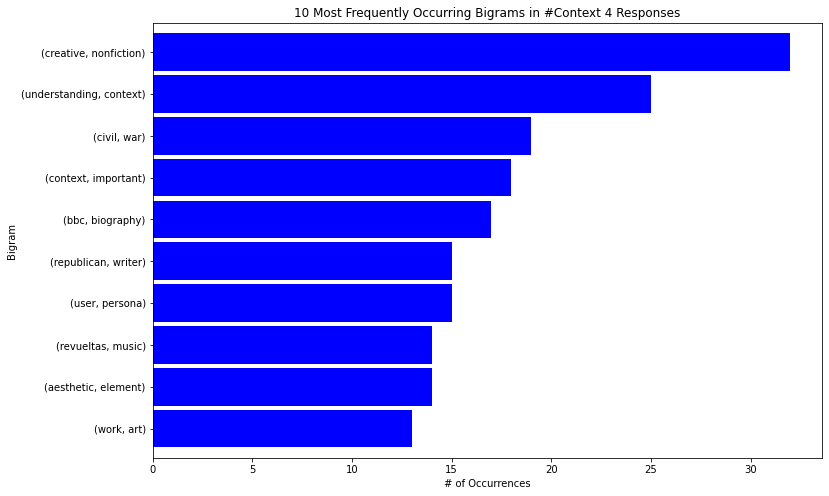

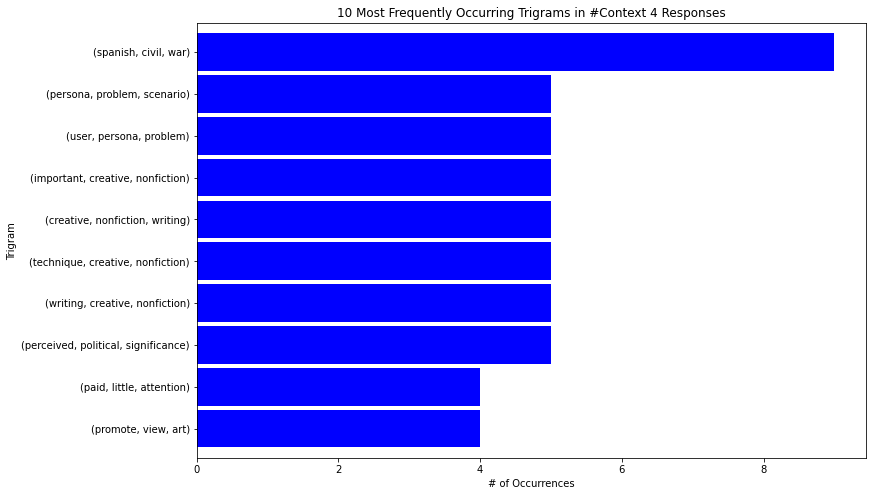

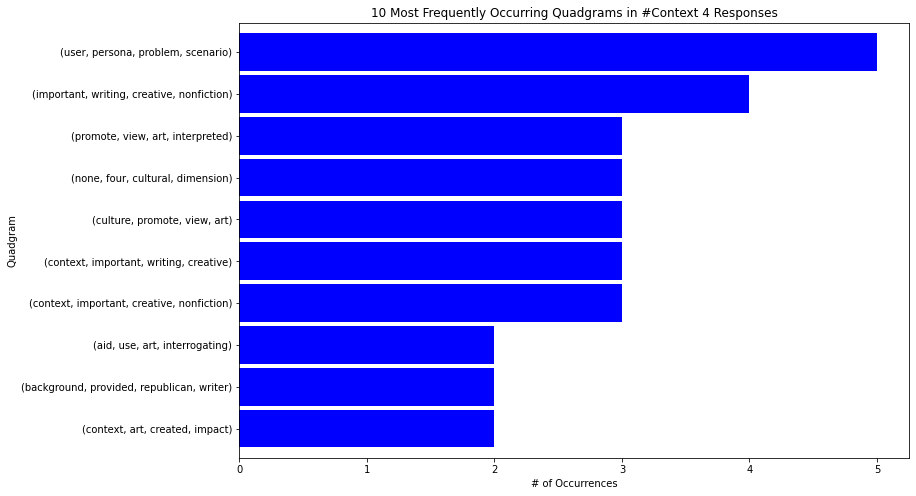

-------------------------------


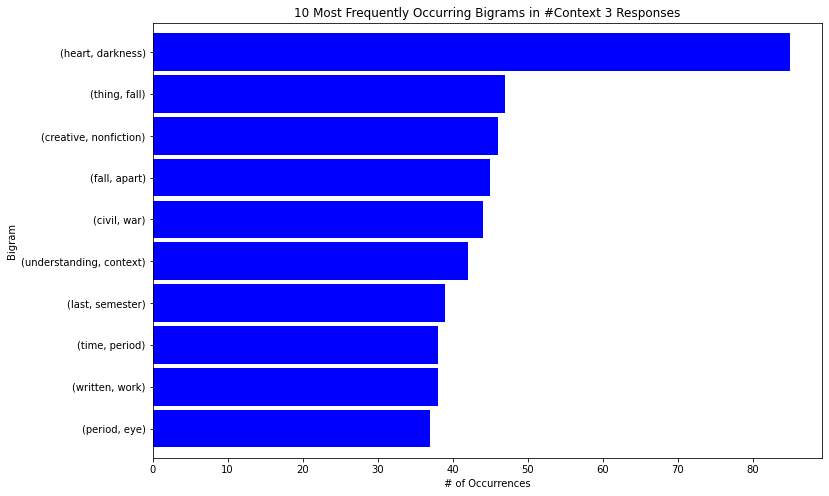

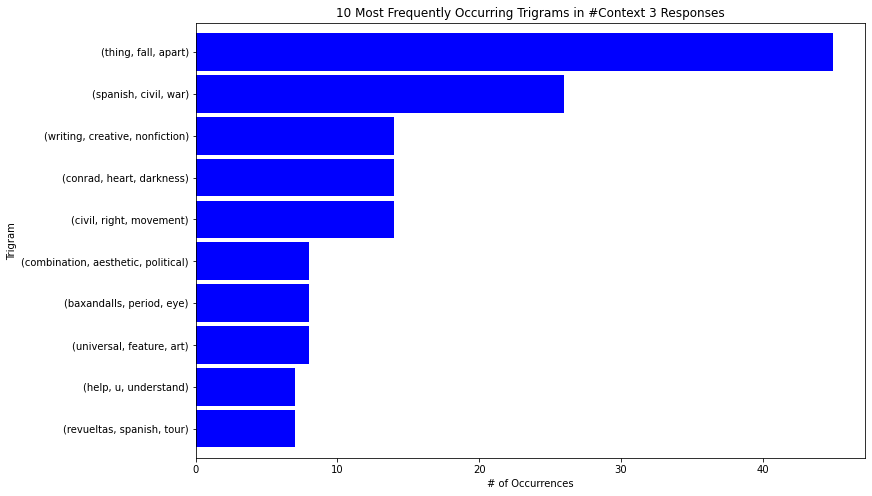

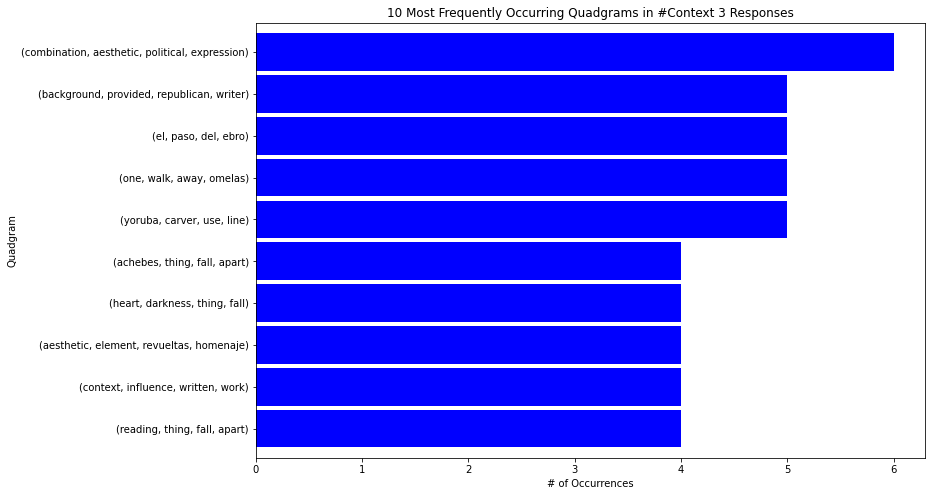

-------------------------------


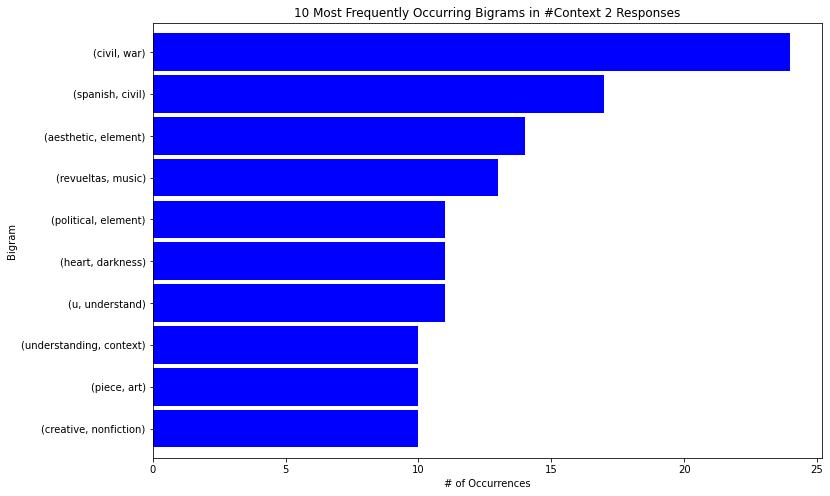

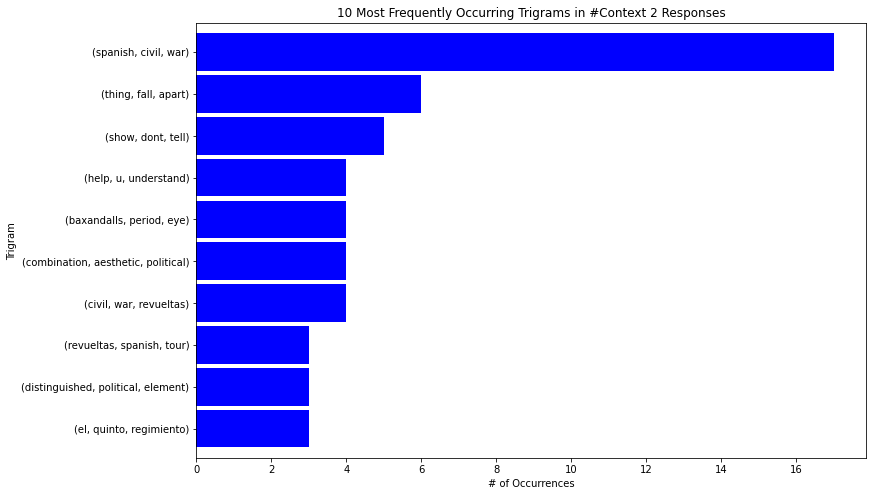

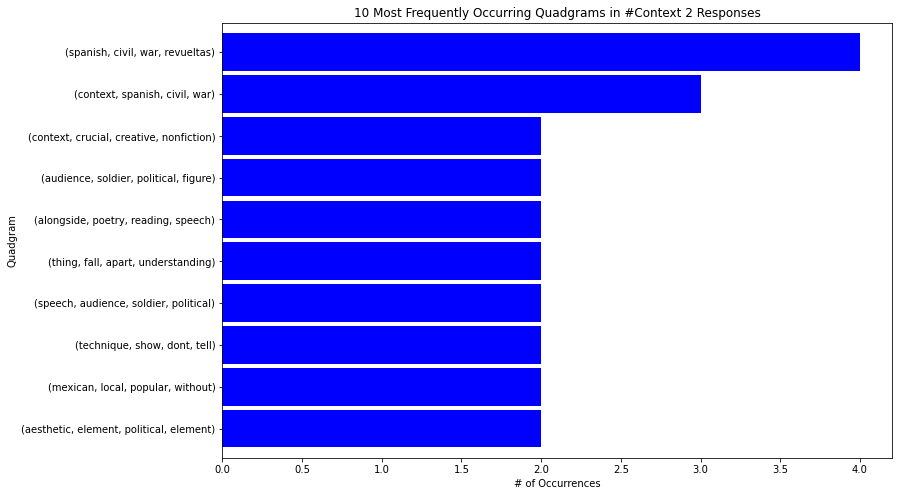

-------------------------------


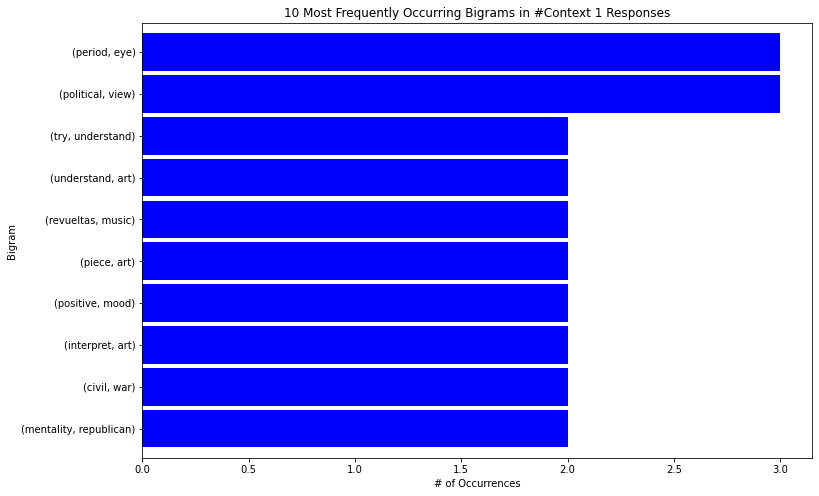

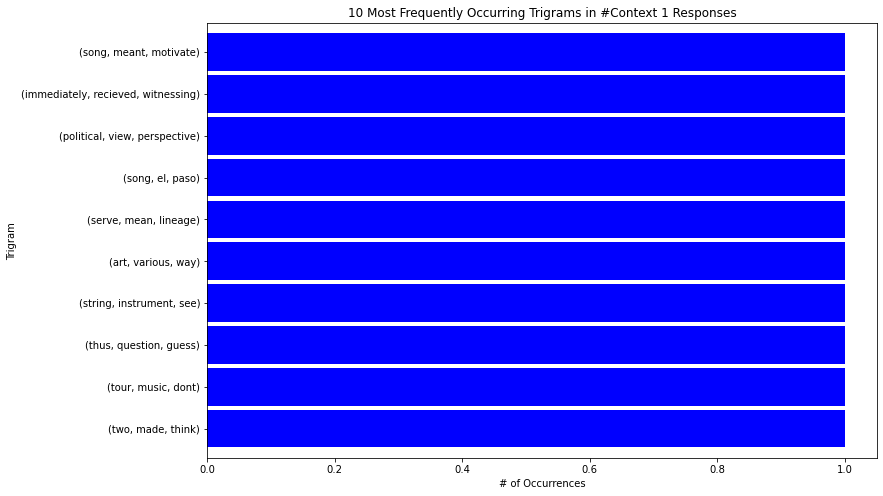

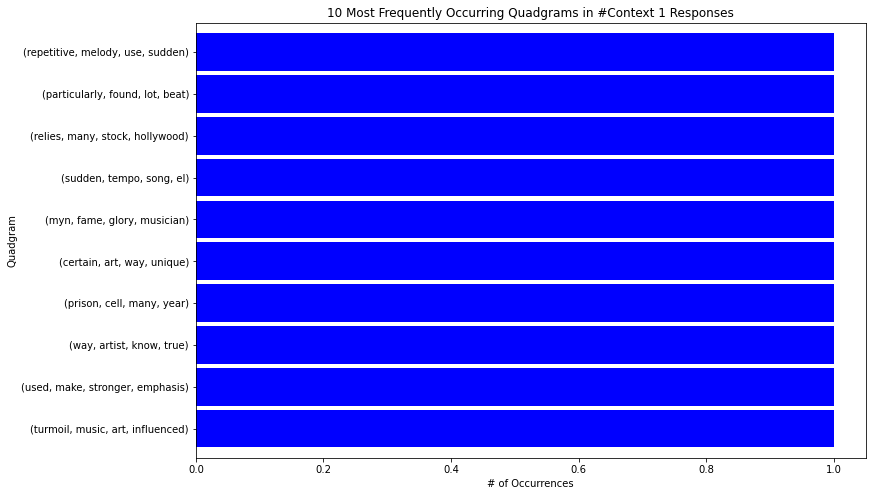

In [139]:
context_4 = context.loc[context['Assessment reports Score'] == 4.0]
context_3 = context.loc[context['Assessment reports Score'] == 3.0]
context_2 = context.loc[context['Assessment reports Score'] == 2.0]
context_1 = context.loc[context['Assessment reports Score'] == 1.0]

c4_words = basic_clean(''.join(str(context_4['Poll Responses Response'].tolist())))
c3_words = basic_clean(''.join(str(context_3['Poll Responses Response'].tolist())))
c2_words = basic_clean(''.join(str(context_2['Poll Responses Response'].tolist())))
c1_words = basic_clean(''.join(str(context_1['Poll Responses Response'].tolist())))

# context n-grams
c4_bi = (pd.Series(nltk.ngrams(c4_words, 2)).value_counts())[:10]
c4_tri = (pd.Series(nltk.ngrams(c4_words, 3)).value_counts())[:10]
c4_quad = (pd.Series(nltk.ngrams(c4_words, 4)).value_counts())[:10]

c3_bi = (pd.Series(nltk.ngrams(c3_words, 2)).value_counts())[:10]
c3_tri = (pd.Series(nltk.ngrams(c3_words, 3)).value_counts())[:10]
c3_quad = (pd.Series(nltk.ngrams(c3_words, 4)).value_counts())[:10]

c2_bi = (pd.Series(nltk.ngrams(c2_words, 2)).value_counts())[:10]
c2_tri = (pd.Series(nltk.ngrams(c2_words, 3)).value_counts())[:10]
c2_quad = (pd.Series(nltk.ngrams(c2_words, 4)).value_counts())[:10]

c1_bi = (pd.Series(nltk.ngrams(c1_words, 2)).value_counts())[:10]
c1_tri = (pd.Series(nltk.ngrams(c1_words, 3)).value_counts())[:10]
c1_quad = (pd.Series(nltk.ngrams(c1_words, 4)).value_counts())[:10]

# plots
c4_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Context 4 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

c4_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Context 4 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

c4_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Context 4 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

c3_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Context 3 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

c3_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Context 3 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

c3_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Context 3 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

c2_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Context 2 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

c2_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Context 2 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

c2_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Context 2 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

c1_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Context 1 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

c1_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Context 1 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

c1_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Context 1 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

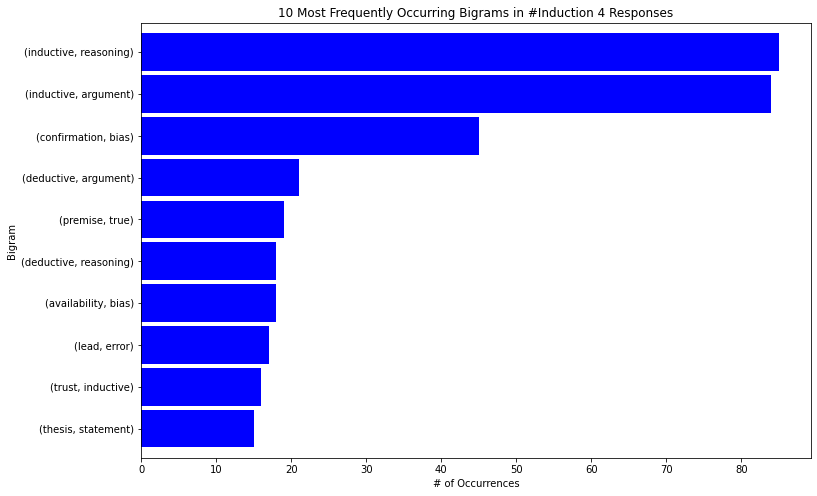

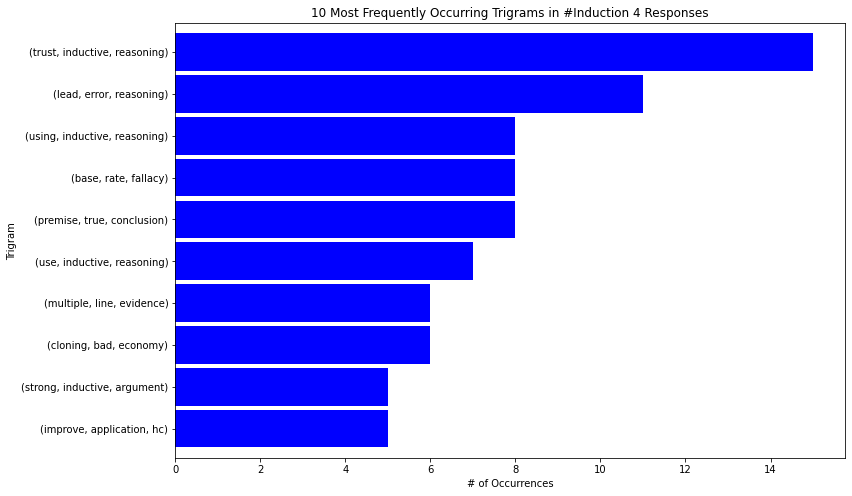

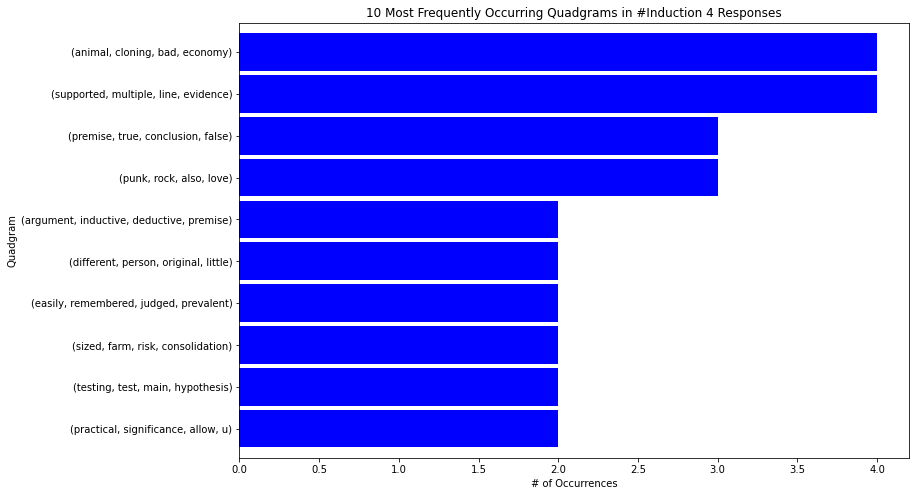

-------------------------------


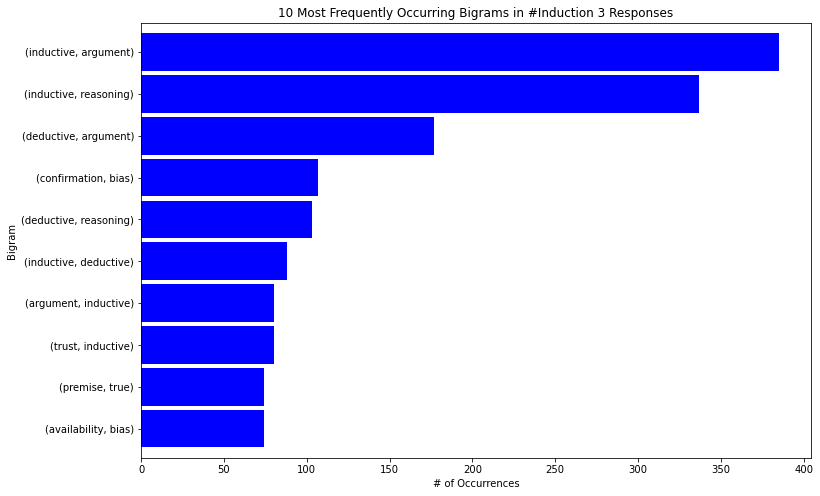

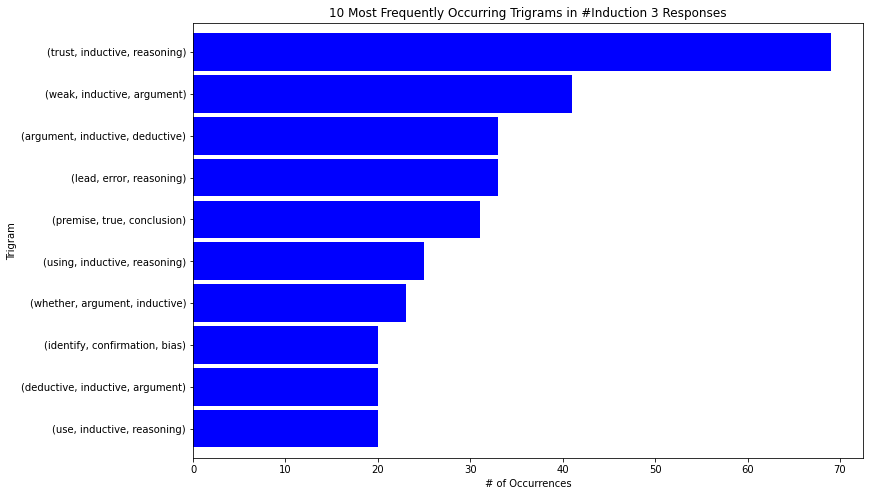

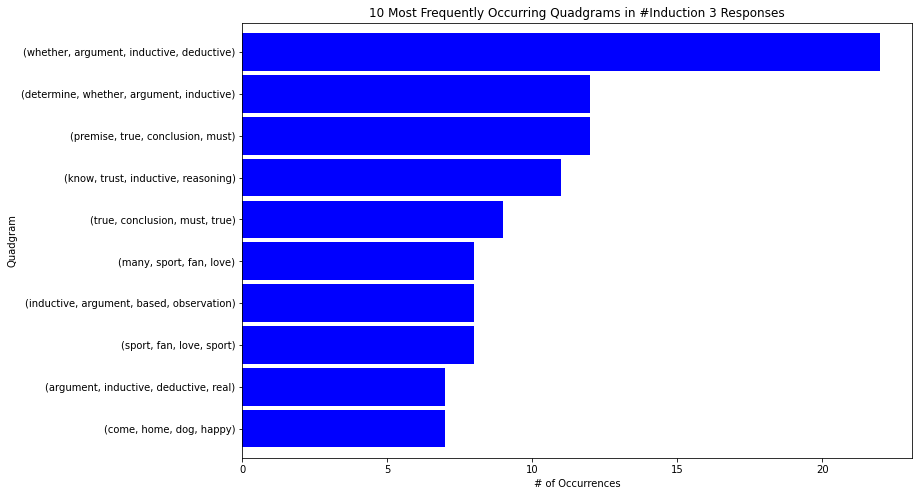

-------------------------------


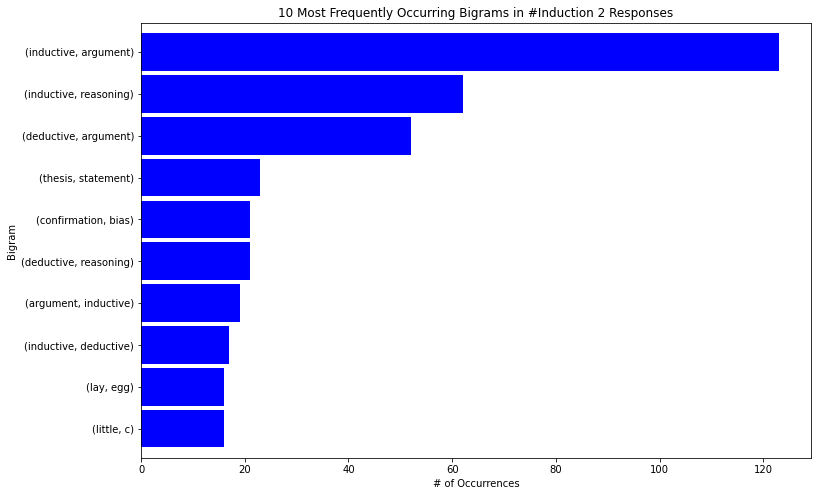

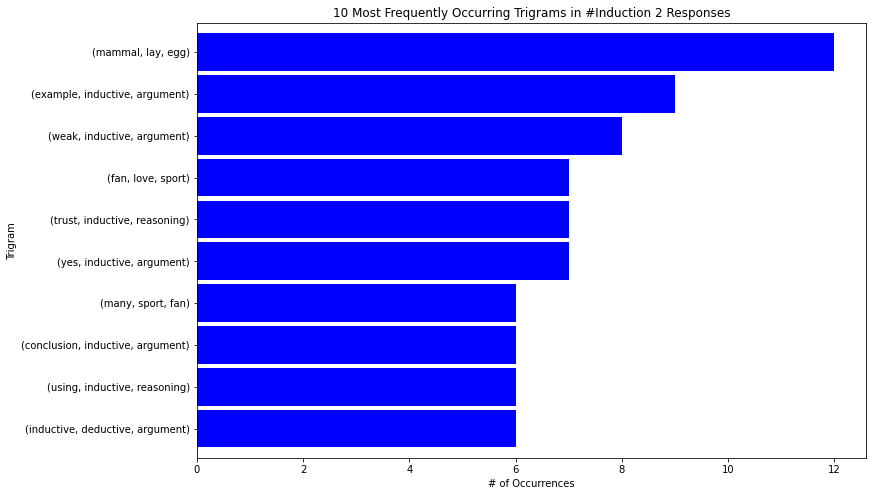

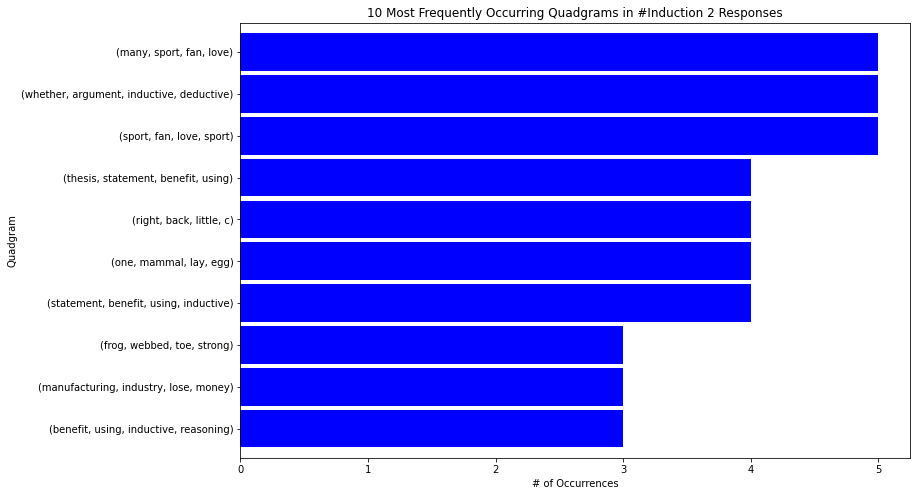

-------------------------------


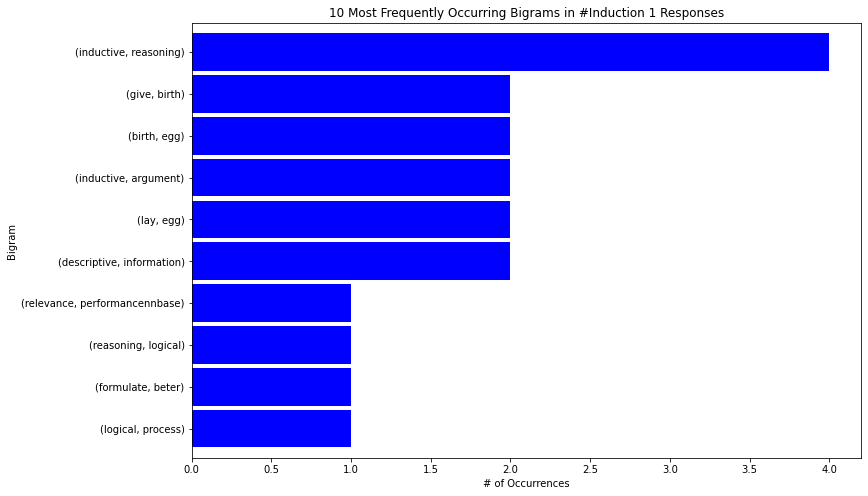

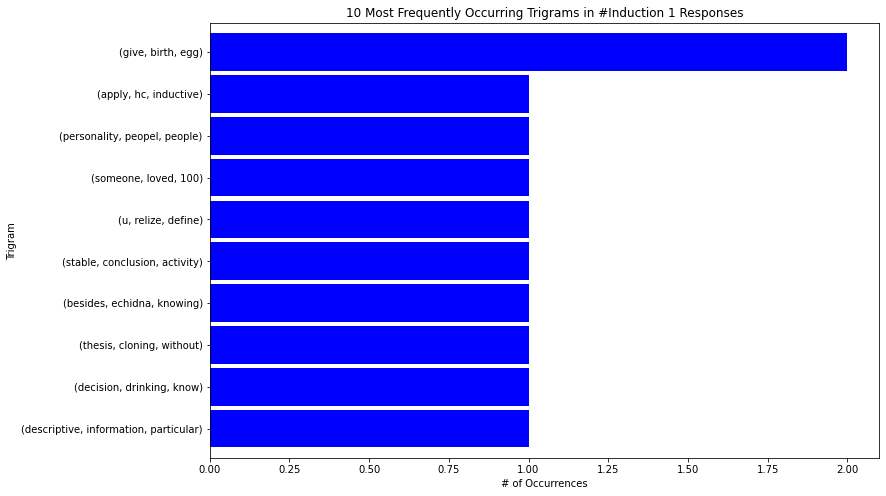

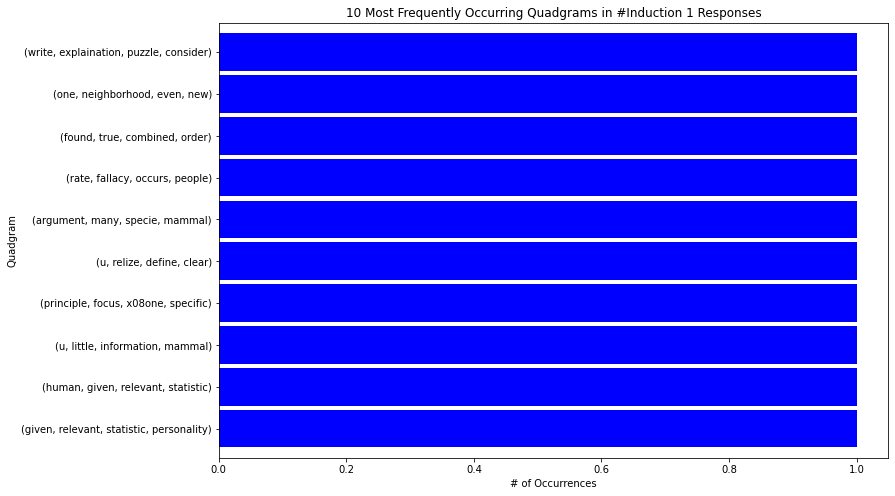

In [141]:
induction_4 = induction.loc[induction['Assessment reports Score'] == 4.0]
induction_3 = induction.loc[induction['Assessment reports Score'] == 3.0]
induction_2 = induction.loc[induction['Assessment reports Score'] == 2.0]
induction_1 = induction.loc[induction['Assessment reports Score'] == 1.0]

i4_words = basic_clean(''.join(str(induction_4['Poll Responses Response'].tolist())))
i3_words = basic_clean(''.join(str(induction_3['Poll Responses Response'].tolist())))
i2_words = basic_clean(''.join(str(induction_2['Poll Responses Response'].tolist())))
i1_words = basic_clean(''.join(str(induction_1['Poll Responses Response'].tolist())))

# induction n-grams
i4_bi = (pd.Series(nltk.ngrams(i4_words, 2)).value_counts())[:10]
i4_tri = (pd.Series(nltk.ngrams(i4_words, 3)).value_counts())[:10]
i4_quad = (pd.Series(nltk.ngrams(i4_words, 4)).value_counts())[:10]

i3_bi = (pd.Series(nltk.ngrams(i3_words, 2)).value_counts())[:10]
i3_tri = (pd.Series(nltk.ngrams(i3_words, 3)).value_counts())[:10]
i3_quad = (pd.Series(nltk.ngrams(i3_words, 4)).value_counts())[:10]

i2_bi = (pd.Series(nltk.ngrams(i2_words, 2)).value_counts())[:10]
i2_tri = (pd.Series(nltk.ngrams(i2_words, 3)).value_counts())[:10]
i2_quad = (pd.Series(nltk.ngrams(i2_words, 4)).value_counts())[:10]

i1_bi = (pd.Series(nltk.ngrams(i1_words, 2)).value_counts())[:10]
i1_tri = (pd.Series(nltk.ngrams(i1_words, 3)).value_counts())[:10]
i1_quad = (pd.Series(nltk.ngrams(i1_words, 4)).value_counts())[:10]

# plots
i4_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Induction 4 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

i4_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Induction 4 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

i4_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Induction 4 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

i3_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Induction 3 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

i3_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Induction 3 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

i3_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Induction 3 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

i2_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Induction 2 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

i2_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Induction 2 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

i2_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Induction 2 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

i1_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Induction 1 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

i1_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Induction 1 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

i1_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Induction 1 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()


### #Networks 4s

In [114]:
# networks_4 n-grams
n4_bi = (pd.Series(nltk.ngrams(n4_words, 2)).value_counts())[:10]
n4_tri = (pd.Series(nltk.ngrams(n4_words, 3)).value_counts())[:10]
n4_quad = (pd.Series(nltk.ngrams(n4_words, 4)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

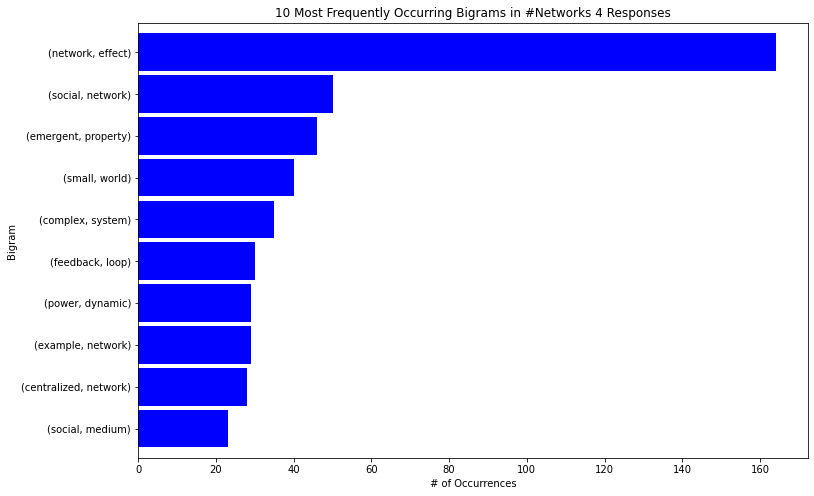

In [115]:
n4_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Networks 4 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

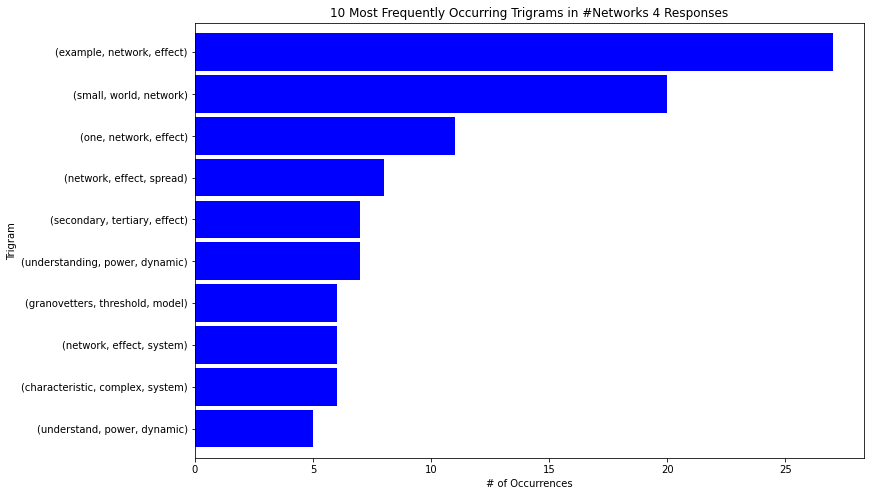

In [116]:
n4_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Networks 4 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

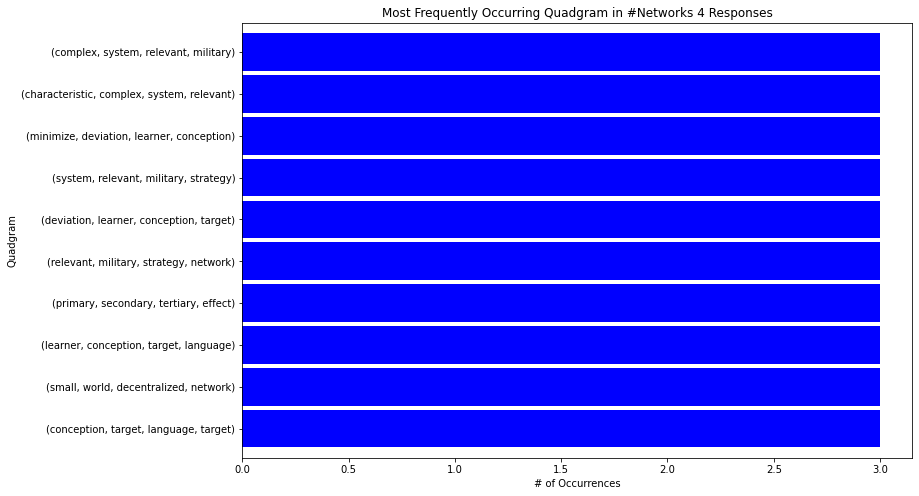

In [117]:
n4_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Most Frequently Occurring Quadgram in #Networks 4 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')

### #Networks 3s

In [118]:
# networks_3 n-grams
n3_bi = (pd.Series(nltk.ngrams(n3_words, 2)).value_counts())[:10]
n3_tri = (pd.Series(nltk.ngrams(n3_words, 3)).value_counts())[:10]
n3_quad = (pd.Series(nltk.ngrams(n3_words, 4)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

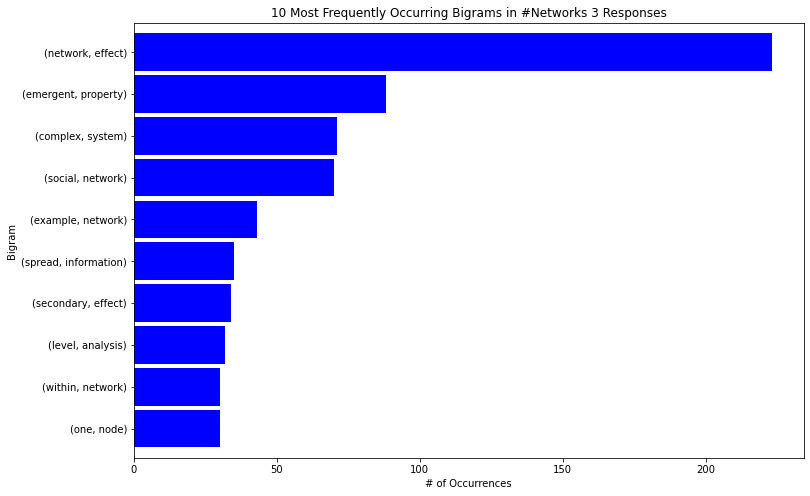

In [119]:
n3_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Networks 3 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

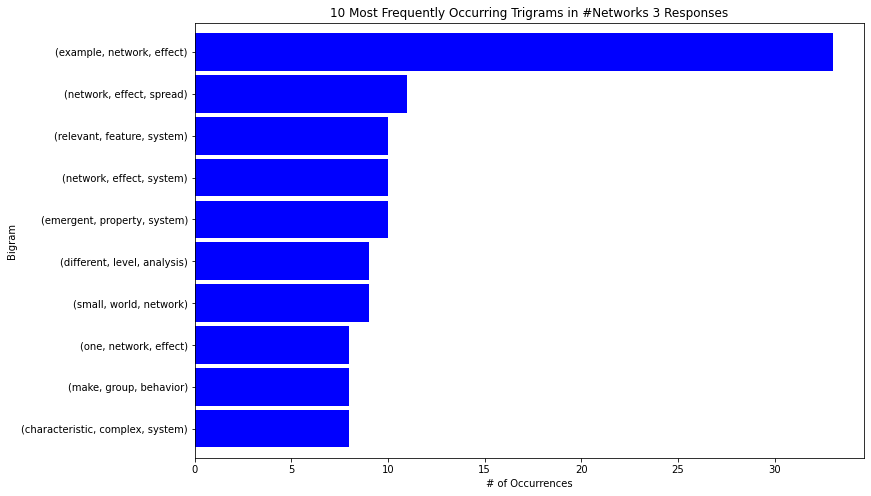

In [120]:
n3_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Networks 3 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

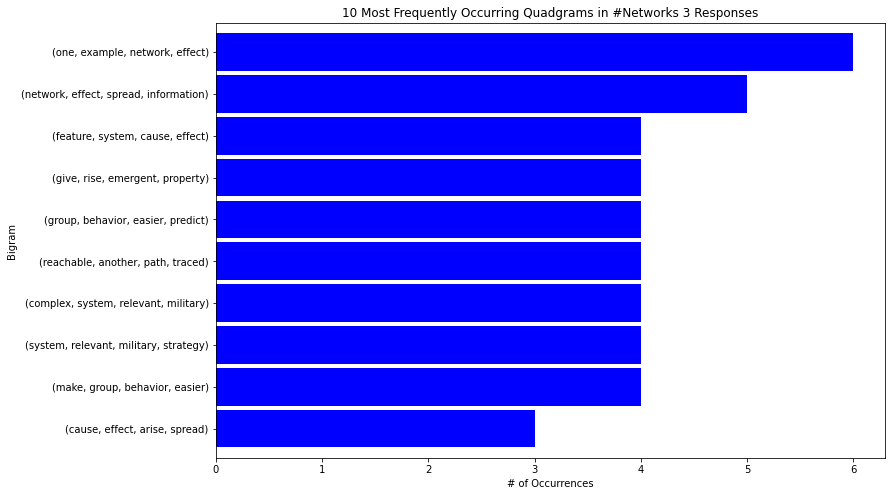

In [121]:
n3_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Networks 3 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

## Networks 2s

In [122]:
# networks_2 n-grams
n2_bi = (pd.Series(nltk.ngrams(n2_words, 2)).value_counts())[:10]
n2_tri = (pd.Series(nltk.ngrams(n2_words, 3)).value_counts())[:10]
n2_quad = (pd.Series(nltk.ngrams(n2_words, 4)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

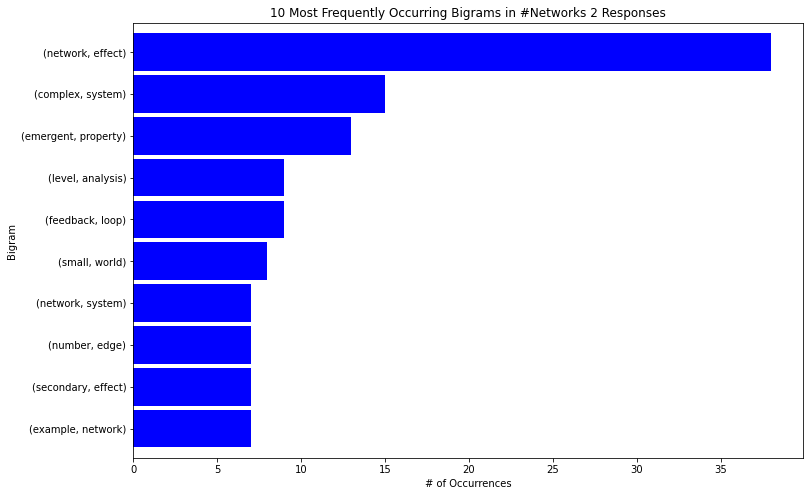

In [123]:
n2_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Networks 2 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

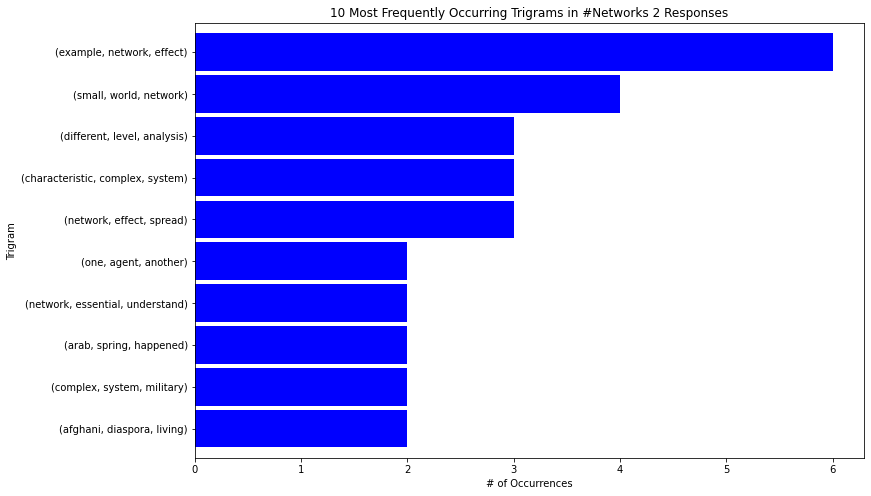

In [124]:
n2_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Networks 2 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

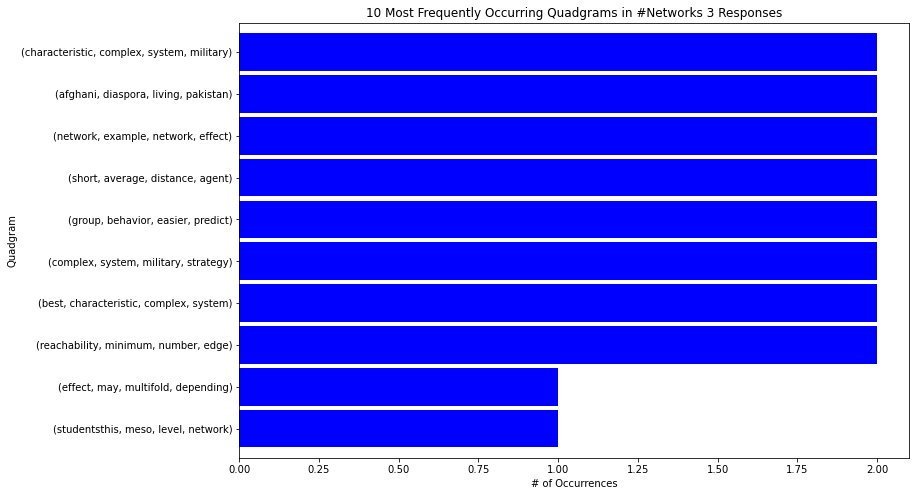

In [125]:
n2_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Networks 3 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')

## Networks 1s

In [126]:
# networks_2 n-grams
n1_bi = (pd.Series(nltk.ngrams(n1_words, 2)).value_counts())[:10]
n1_tri = (pd.Series(nltk.ngrams(n1_words, 3)).value_counts())[:10]
n1_quad = (pd.Series(nltk.ngrams(n1_words, 4)).value_counts())[:10]

Text(0.5, 0, '# of Occurrences')

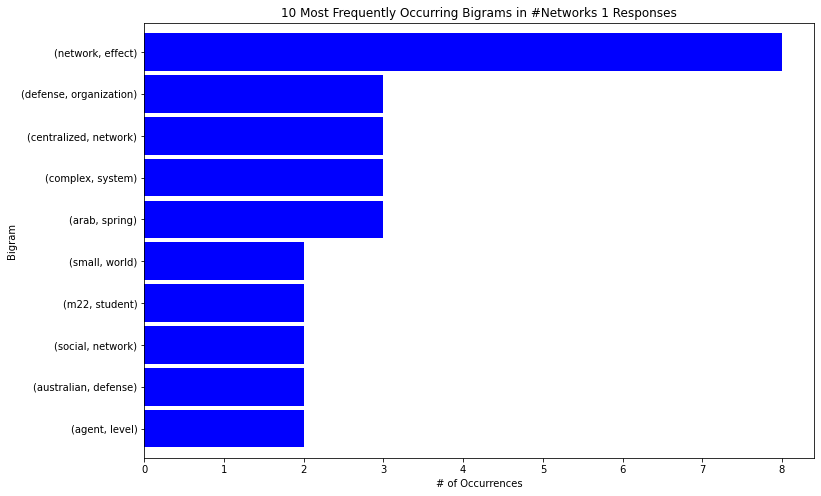

In [127]:
n1_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Networks 1 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

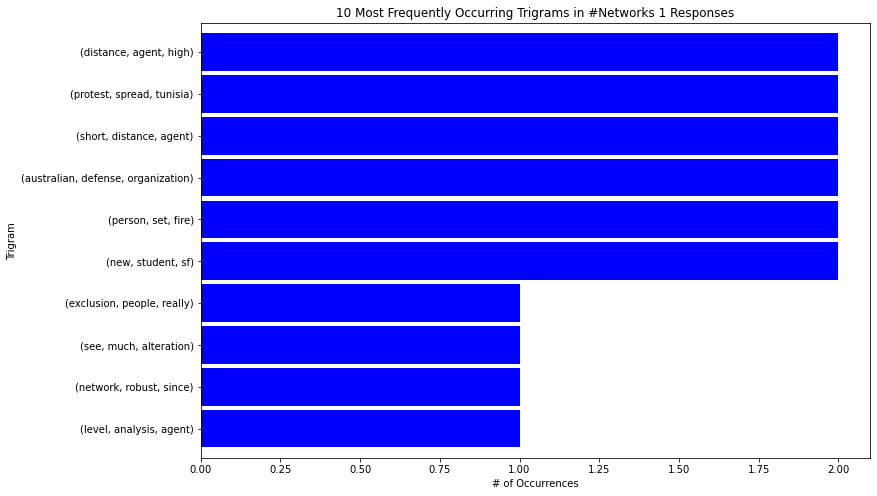

In [128]:
n1_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Networks 1 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')

Text(0.5, 0, '# of Occurrences')

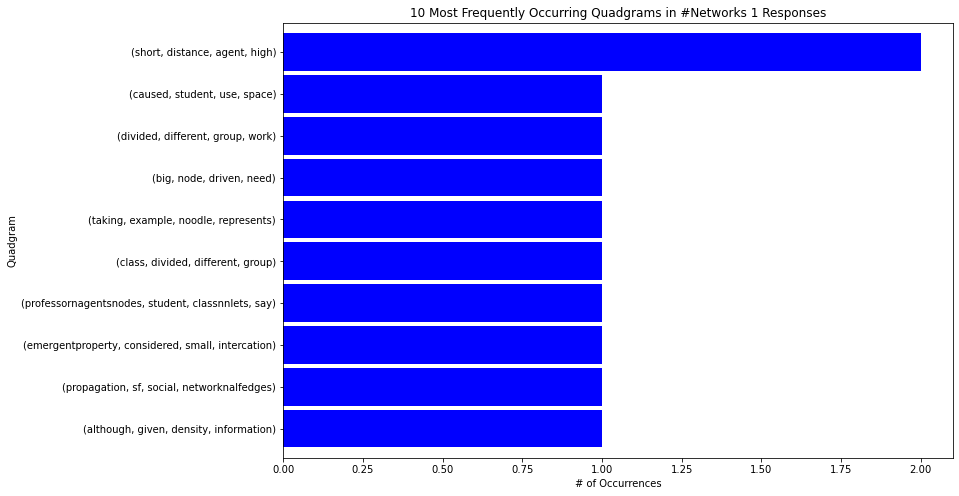

In [129]:
n1_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Networks 1 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')

## General pipeline

In [ ]:
f'{hclo}_4' = hclo.loc[hclo['Assessment reports Score'] == 4.0]
f'{hclo}_3' = hclo.loc[hclo['Assessment reports Score'] == 3.0]
f'{hclo}_2' = hclo.loc[hclo['Assessment reports Score'] == 2.0]
f'{hclo}_1' = hclo.loc[hclo['Assessment reports Score'] == 1.0]

f'{hclo}_4_words' = basic_clean(''.join(str(f'{hclo}_4'['Poll Responses Response'].tolist())))
f'{hclo}_3_words' = basic_clean(''.join(str(f'{hclo}_3'['Poll Responses Response'].tolist())))
f'{hclo}_2_words' = basic_clean(''.join(str(f'{hclo}_2'['Poll Responses Response'].tolist())))
f'{hclo}_1_words' = basic_clean(''.join(str(f'{hclo}_1'['Poll Responses Response'].tolist())))

# breakitdown n-grams
f'{hclo}_4_bi' = (pd.Series(nltk.ngrams(f'{hclo}_4_words', 2)).value_counts())[:10]
f'{hclo}_4_tri' = (pd.Series(nltk.ngrams(f'{hclo}_4_words', 3)).value_counts())[:10]
f'{hclo}_4_quad' = (pd.Series(nltk.ngrams(f'{hclo}_4_words', 4)).value_counts())[:10]


f'{hclo}_3_bi' = (pd.Series(nltk.ngrams(f'{hclo}_3_words', 2)).value_counts())[:10]
f'{hclo}_3_tri' = (pd.Series(nltk.ngrams(f'{hclo}_3_words', 3)).value_counts())[:10]
f'{hclo}_3_quad' = (pd.Series(nltk.ngrams(f'{hclo}_3_words', 4)).value_counts())[:10]

f'{hclo}_2_bi' = (pd.Series(nltk.ngrams(f'{hclo}_2_words', 2)).value_counts())[:10]
f'{hclo}_2_tri' = (pd.Series(nltk.ngrams(f'{hclo}_2_words', 3)).value_counts())[:10]
f'{hclo}_2_quad' = (pd.Series(nltk.ngrams(f'{hclo}_2_words', 4)).value_counts())[:10]

f'{hclo}_1_bi' = (pd.Series(nltk.ngrams(f'{hclo}_1_words', 2)).value_counts())[:10]
f'{hclo}_1_tri' = (pd.Series(nltk.ngrams(f'{hclo}_1_words', 3)).value_counts())[:10]
f'{hclo}_1_quad' = (pd.Series(nltk.ngrams(f'{hclo}_1_words', 4)).value_counts())[:10]


# plots
b4_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 4 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

b4_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 4 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

b4_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 4 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

b3_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 3 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

b3_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 3 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

b3_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 3 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

b2_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 2 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

b2_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 2 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

b2_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 2 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()

print('-------------------------------')

b1_bi.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Bigrams in #Breakitdown 1 Responses')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

b1_tri.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Trigrams in #Breakitdown 1 Responses')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()

b1_quad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occurring Quadgrams in #Breakitdown 1 Responses')
plt.ylabel('Quadgram')
plt.xlabel('# of Occurrences')
plt.show()